# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

# 2. Collect and load data

In [3]:
df = pd.read_csv('bigcity.csv',index_col=0)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'bigcity.csv'

# 3. Explore numeric variables - five number summary

In [11]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

In [93]:
plt.rcParams['figure.figsize'] = [15,8]

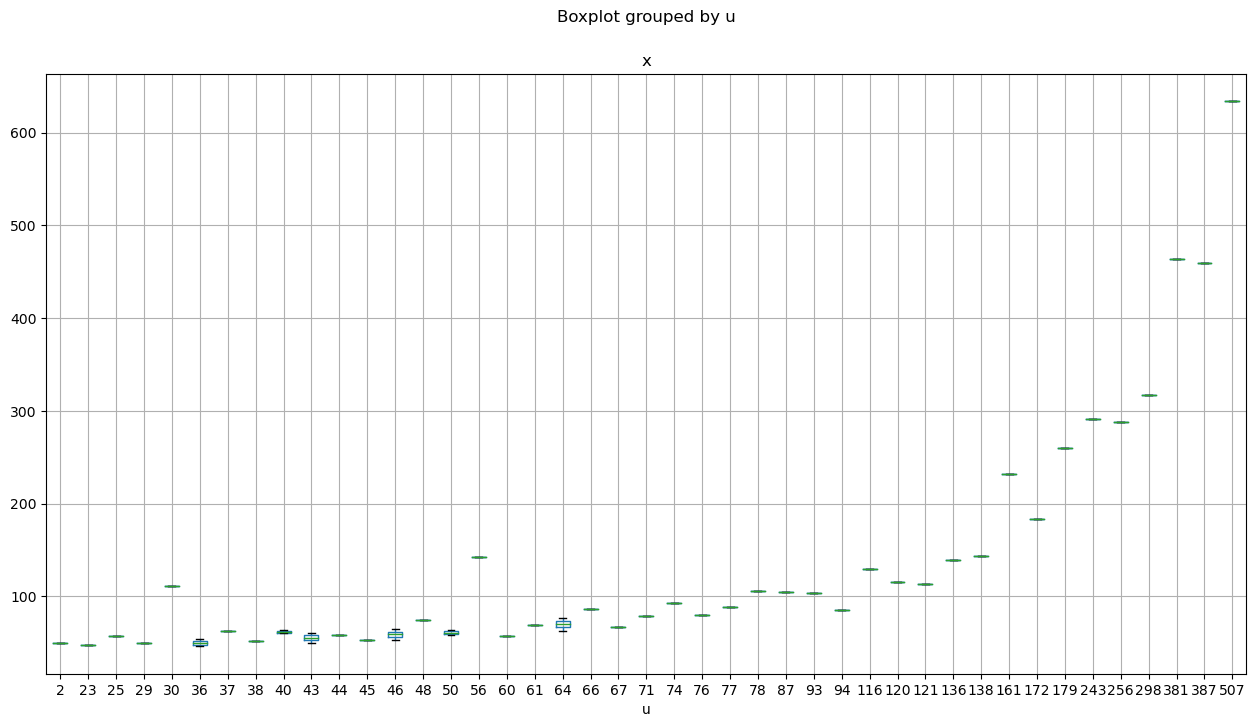

In [94]:
df.boxplot(column='x',by='u')
plt.show()

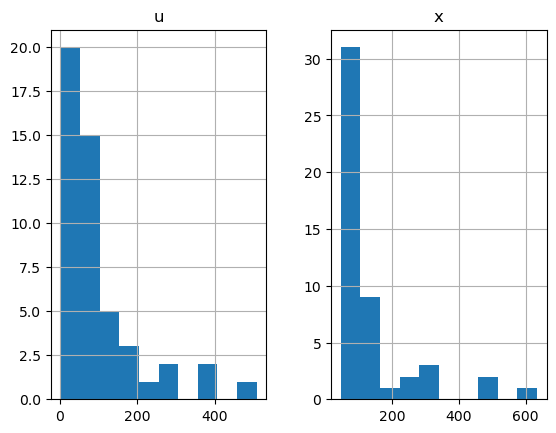

In [17]:
df.hist()
plt.show()

In [18]:
df.var()

u    10900.416667
x    15158.832483
dtype: float64

In [19]:
df.std()

u    104.405061
x    123.121211
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

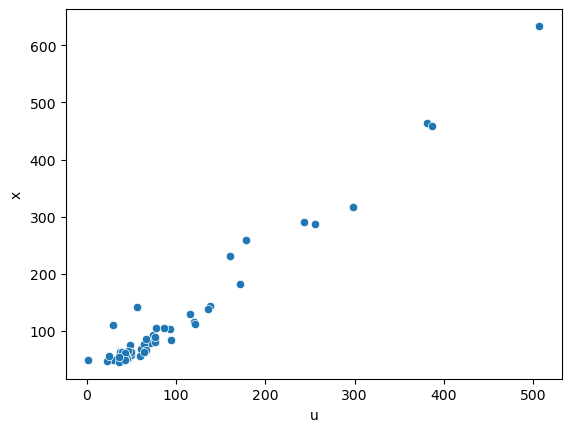

In [89]:
sns.scatterplot(df['u'],df['x'])
plt.show()

The population of both the years are increasing upwards

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [35]:
X = df['u']
Y = df['x']

In [36]:
X.shape

(49,)

In [37]:
Y.shape

(49,)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [87]:
np.array(d1.isna())

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

In [28]:
np.array(d1.corr())

array([[1.        , 0.98174195],
       [0.98174195, 1.        ]])

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=10)

In [39]:
x_train.shape

(39,)

In [40]:
x_test.shape

(10,)

In [41]:
y_train.shape

(39,)

In [42]:
y_test.shape

(10,)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [50]:
X = df[['u']]
y = df['x']
LR = LinearRegression()
model = LR.fit(X,Y)
print('Coefficient of the model',model.coef_)
print('Intercept of the model',model.intercept_)

Coefficient of the model [1.1577337]
Intercept of the model 8.383956333192643


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

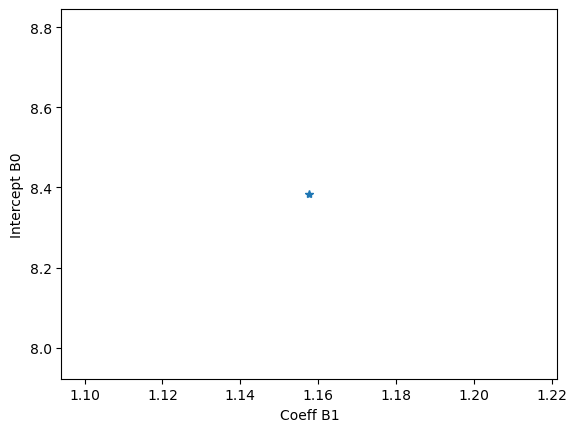

In [90]:
plt.plot(model.coef_,model.intercept_,'*')
plt.xlabel('Coeff B1')
plt.ylabel('Intercept B0')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [71]:
X = df['u']
Y = df['x']
Xc = sm.add_constant(X)
model_10 = sm.OLS(Y,Xc).fit()
print(model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1252.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.57e-35
Time:                        13:39:27   Log-Likelihood:                -223.55
No. Observations:                  49   AIC:                             451.1
Df Residuals:                      47   BIC:                             454.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3840      4.777      1.755      0.0

In [77]:
X = df[['u']]
Y = df['x']
LR = LinearRegression()
model_10 = LR.fit(X,Y)
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=10)
train_pred = model_10.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
rmse_train = np.sqrt(mse_train)
print('Rmse of training data',rmse_train)
test_pred = model_10.predict(x_test)
mse_test = mean_squared_error(y_test,test_pred)
rmse_test = np.sqrt(mse_test)
print('Rmse of Test data',rmse_test)

Rmse of training data 21.51818920704898
Rmse of Test data 28.756153055597245


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [79]:
from sklearn.metrics import r2_score

In [85]:
X = df[['u']]
Y = df['x']
LR = LinearRegression()
model_10 = LR.fit(X,Y)
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=10)
train_pred = model_10.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
rmse_train = np.sqrt(mse_train)
print('Rmse of training data',rmse_train)
test_pred = model_10.predict(x_test)
mse_test = mean_squared_error(y_test,test_pred)
rmse_test = np.sqrt(mse_test)
print('Rmse of Test data',rmse_test)
r2_train = r2_score(y_train,train_pred)
print('R2 for training data',r2_train)
r2_test = r2_score(y_test,test_pred)
print('R2 for test data',r2_test)

Rmse of training data 21.51818920704898
Rmse of Test data 28.756153055597245
R2 for training data 0.9734111458019111
R2 for test data 0.7866022352111136


The model is having the low Rmse for the test data ,so the model is underfit

The training R2 is value close to 97% so the model is performing good

The test R2 value is close to 78% so the model is not that good compared to training data